# Projet Vinasse
## Introduction
Ce notebook a pour objectif de vous pr√©senter notre analyse de donn√©es sur des datasets li√©s au vin.
L'objectif principal de ce projet est donc de r√©aliser une analyse exploratoire des donn√©es. Ce notebook pr√©sente chaque √©tape du processus, tout en fournissant des visualisations d√©taill√©es pour faciliter la compr√©hension des r√©sultats.

## Probl√©matiques
Le prix du vin influence-t-il la qualit√© du vin ?
Est ce que les pays qui produisent le plus de vin sont les mieux not√©s ?

## Jeux de donn√©es
Afin de r√©aliser cette analyse, nous avons s√©lectionn√© diff√©rents datasets :

### winemag.csv

"winemag.csv" qui provient de Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting).
Ce fichier CSV contient les prix et les notations de nombreux vins √† travers le monde.

INFORMATION SUR LES COLONNES :
- **country** : Le pays o√π le vin est produit
- **description** : Une description du vin
- **designation** : Le nom du vignoble o√π le raisin qui a fait le vin a √©t√© r√©colt√©
- **points** : La note donn√©e au vin par le d√©gustateur
- **price** : Le prix du vin
- **province** : La r√©gion ou l'√©tat o√π le vin est produit
- **region_1** : La r√©gion viticole dans laquelle le vin est produite
- **region_2** : Une r√©gion plus sp√©cifique
- **taster_name** : Le nom du d√©gustateur
- **taster_twitter_handle** : Le compte Twitter du d√©gustateur
- **title** : Le titre du vin
- **variety** : Le type de raisin utilis√© pour produire le vin
- **winery** : Le nom du producteur de vin

### wine-production.csv

"wine-production.csv" qui provient de *"Food and Agriculture Organization of the United Nations (2023)" ‚Äì avec un traitement majeur par Our World in Data*.
Ce fichier CSV contient les productions de vin par ann√©e dans diff√©rentes r√©gions.

INFORMATION SUR LES COLONNES :
- **Area** : La r√©gion o√π le vin est produit    
- **Year** : L'ann√©e de production
- **Value** : La quantit√© de vin produite

## Structure du notebook 

[Installation des pr√©requis](#INSTALLATION-DES-PREREQUIS)

[Nettoyage des donn√©es](#NETTOYAGE-DES-DONNEES)  

[Analyse des donn√©es](#ANALYSE-DES-DONNEES) 

[Mod√©lisation](#MODELISATION)  

[Conclusion](#CONCLUSION)

# INSTALLATION DES PREREQUIS

In [ ]:
%pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NETTOYAGE DES DONNEES


## nettoyage de "winemag.csv"

In [4]:
%matplotlib inline
file_path = "data/winemag.csv"  # Modifier avec le chemin correct
df = pd.read_csv(file_path)

In [5]:
df.head()

id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulk√† Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O‚ÄôKeefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulk√† Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine¬†      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine¬†  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [ ]:
df.info()

In [6]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)


Valeurs manquantes par colonne :
 id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [7]:
df.describe()

id         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

In [8]:
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


## Nettoyage de "wine-prodution"


In [10]:
file_path = "data/wine-production/wine-production.csv"  # Modifier avec le chemin correct
df_prod = pd.read_csv(file_path)

In [11]:
df_prod.head()

Entity Code  Year       Wine
0  Africa  NaN  1961  2041926.0
1  Africa  NaN  1962  2232189.0
2  Africa  NaN  1963  2070770.0
3  Africa  NaN  1964  1856545.0
4  Africa  NaN  1965  2389869.0

In [21]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  5969 non-null   object 
 1   Code    3765 non-null   object 
 2   Year    5969 non-null   int64  
 3   Wine    5969 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.7+ KB


In [22]:
missing_values = df_prod.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Entity       0
Code      2204
Year         0
Wine         0
dtype: int64


In [23]:
duplicates = df_prod.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


# ANALYSE DES DONNEES 

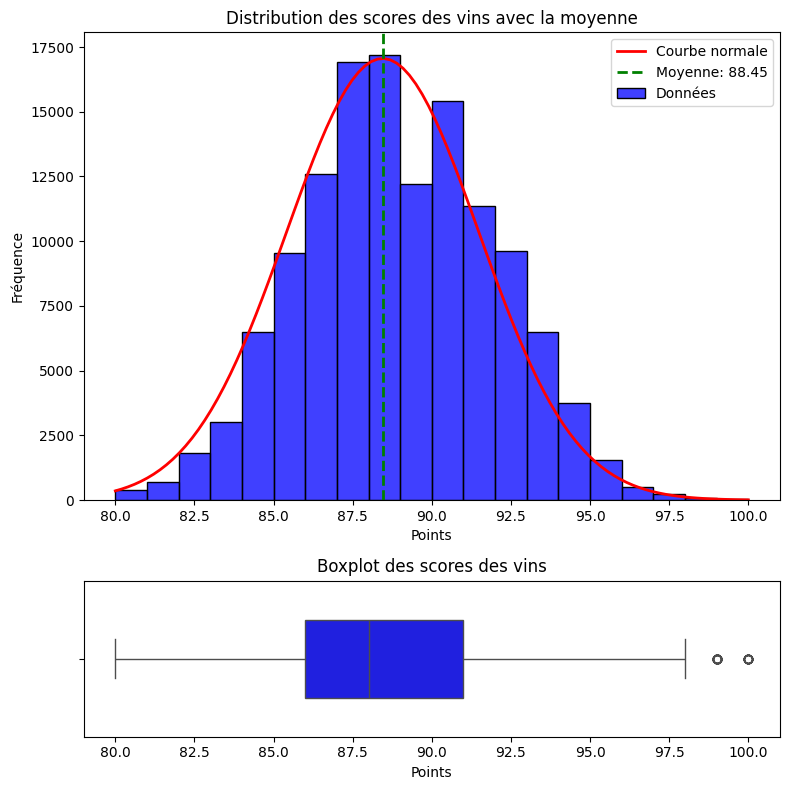

In [30]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne et de l'√©cart-type
mean = df["points"].mean()
std = df["points"].std()

# G√©n√©rer les valeurs pour la courbe normale
x = np.linspace(df["points"].min(), df["points"].max(), 100)
normal_curve = norm.pdf(x, mean, std) * len(df["points"]) * (df["points"].max() - df["points"].min()) / 20  # Adapter √† l'√©chelle de l'histogramme

# Cr√©er une figure avec deux sous-graphiques : un pour l'histogramme et un pour la bo√Æte √† moustaches
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": [3, 1]})

# Tracer l'histogramme avec la courbe normale sur le premier graphique
sns.histplot(df["points"], bins=20, kde=False, color="blue", label="Donn√©es", ax=ax[0])
ax[0].plot(x, normal_curve, color="red", label="Courbe normale", linewidth=2)
ax[0].axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Moyenne: {mean:.2f}")
ax[0].set_title("Distribution des scores des vins avec la moyenne")
ax[0].set_xlabel("Points")
ax[0].set_ylabel("Fr√©quence")
ax[0].legend()

# Tracer la bo√Æte √† moustaches sur le deuxi√®me graphique
sns.boxplot(x=df["points"], ax=ax[1], color="blue", width=0.5)
ax[1].set_title("Boxplot des scores des vins")
ax[1].set_xlabel("Points")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Forme de la distribution :

La distribution semble asym√©trique √† droite (l√©g√®rement inclin√©e), car il y a une concentration plus √©lev√©e autour de 87-88, avec une queue qui s'√©tire vers des scores plus √©lev√©s (au-del√† de 90).
Cela signifie que la plupart des vins obtiennent des scores moyens (entre 85 et 90), mais il existe quelques vins d'exception avec des scores √©lev√©s.

Courbe normale (rouge) :

La courbe normale est superpos√©e pour comparer la distribution r√©elle avec une distribution th√©orique normale.
Bien que les donn√©es suivent grossi√®rement une forme normale, elles pr√©sentent une l√©g√®re d√©viation : la queue droite est plus longue, indiquant une distribution l√©g√®rement biais√©e.

Moyenne (ligne verte) :

La moyenne des scores est d‚Äôenviron 88,45 (indiqu√©e dans la l√©gende).
Cela montre que les vins √©valu√©s sont majoritairement dans une gamme sup√©rieure de qualit√© (puisque les scores sont g√©n√©ralement compris entre 80 et 100).
√âtalement des donn√©es :

L‚Äôhistogramme montre une variabilit√© mod√©r√©e. Les scores sont principalement regroup√©s autour de la moyenne (entre 85 et 90), mais la queue droite indique qu‚Äôil existe des scores plus √©lev√©s, probablement attribu√©s √† des vins exceptionnels.

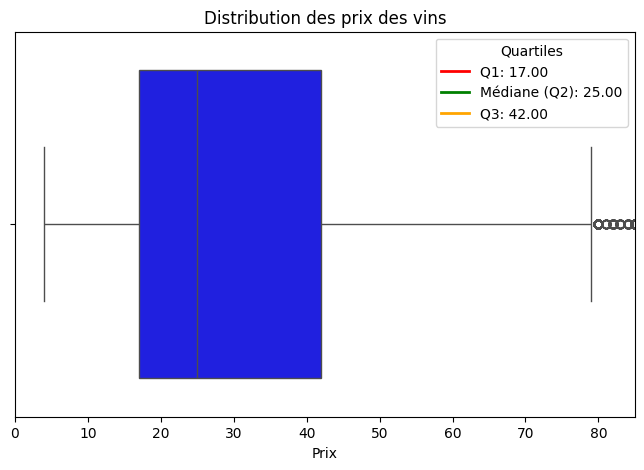

In [26]:
plt.figure(figsize=(8, 5))

# Tracer le boxplot
sns.boxplot(x=df["price"], color="blue")

# Calcul des quartiles
q1 = df["price"].quantile(0.25)
q2 = df["price"].median()  # √âquivalent √† Q2
q3 = df["price"].quantile(0.75)

# Ajouter la l√©gende
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="red", lw=2, label=f"Q1: {q1:.2f}"),
        plt.Line2D([0], [0], color="green", lw=2, label=f"M√©diane (Q2): {q2:.2f}"),
        plt.Line2D([0], [0], color="orange", lw=2, label=f"Q3: {q3:.2f}"),
    ],
    loc="upper right",
    title="Quartiles",
)

# Limite pour exclure les valeurs extr√™mes
plt.xlim(0, df["price"].quantile(0.95))

# Ajouter le titre et les labels
plt.title("Distribution des prix des vins")
plt.xlabel("Prix")
plt.show()

R√©partition des prix : 
On remarque que la distribution des prix est asym√©trique √† droite, avec une concentration plus √©lev√©e autour de 20-40 USD. La m√©diane des prix est de 25 USD, ce qui signifie que la moiti√© des vins co√ªtent moins de 25 USD.
La moustache √©tant plus √©tendue √† droite, cela indique qu'il existe des vins plus chers, mais ils sont moins fr√©quents. Les valeurs extr√™mes sont √©galement visibles, avec des prix allant jusqu'√† 3300 USD. 


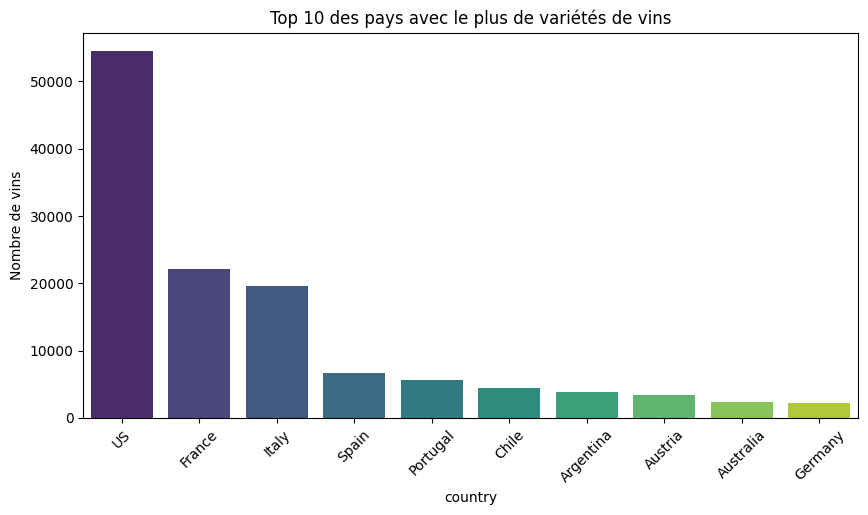

In [27]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis", hue=top_countries.index)
plt.title("Top 10 des pays avec le plus de vari√©t√©s de vins")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

Le diagramme met en √©vidence la domination des grandes nations viticoles comme la France, l‚ÄôItalie, l‚ÄôEspagne et les √âtats-Unis, qui sont les principaux producteurs mondiaux. Si un pays se distingue nettement, cela peut indiquer un biais du dataset ou une forte production et exportation.

On peut observer des disparit√©s : si la d√©croissance est progressive, cela refl√®te une r√©partition naturelle ; une coupure brutale apr√®s les premiers pays sugg√®re une sur-repr√©sentation des leaders. Lier ces donn√©es aux notes et aux prix permettrait d‚Äô√©valuer si quantit√© rime avec qualit√©.

On remarque que les √âtats-Unis sont fortement repr√©sent√©s, ce qui peut indiquer un biais li√© aux sources des donn√©es, souvent influenc√©es par des critiques anglophones. Cela peut entra√Æner un d√©s√©quilibre dans l‚Äôanalyse et masquer la diversit√© des autres pays producteurs. Une analyse plus pouss√©e des points moyens par pays pourrait r√©v√©ler des tendances int√©ressantes sur la qualit√© des vins. üç∑

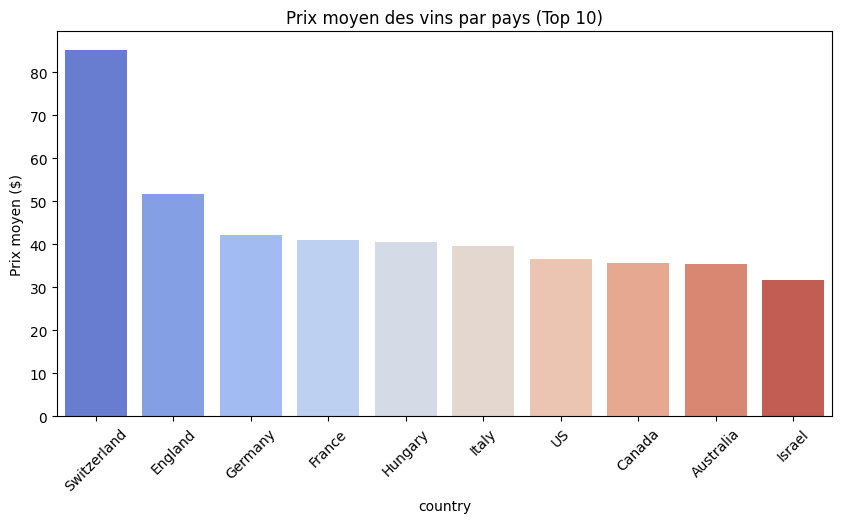

In [16]:
avg_price_country = df.groupby("country")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm", hue=avg_price_country.index)
plt.title("Prix moyen des vins par pays (Top 10)")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


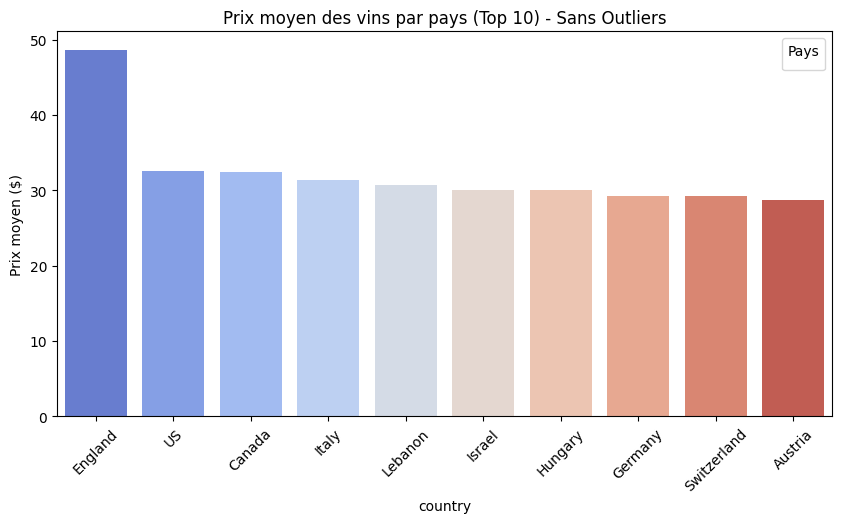

In [28]:
# D√©tection et suppression des outliers selon le crit√®re de Tukey
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les prix sans les outliers
df_no_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

# Calcul du prix moyen par pays sans outliers
avg_price_country_no_outliers = (
    df_no_outliers.groupby("country")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Cr√©ation du graphique
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_price_country_no_outliers.index,
    y=avg_price_country_no_outliers.values,
    palette="coolwarm",
    hue=avg_price_country_no_outliers.index,
)
plt.title("Prix moyen des vins par pays (Top 10) - Sans Outliers")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.legend(title="Pays")
plt.show()

Ce diagramme montre les 10 pays avec les vins les plus chers en moyenne. On observe que certains pays affichent des prix moyens nettement plus √©lev√©s, ce qui peut √™tre d√ª √† une production limit√©e, une forte r√©putation viticole ou une demande premium.

Si un pays se d√©marque largement en t√™te, cela sugg√®re soit un march√© haut de gamme, soit un biais dans le dataset, o√π seuls les vins les plus prestigieux sont recens√©s.

Les √âtats-Unis sont probablement bien repr√©sent√©s, ce qui peut fausser l‚Äôanalyse en raison d‚Äôune surrepr√©sentation des vins am√©ricains dans le dataset. Ce d√©s√©quilibre pourrait masquer d‚Äôautres pays proposant aussi des vins haut de gamme mais en plus faible quantit√© dans les donn√©es. Une analyse crois√©e avec la distribution des points permettrait de v√©rifier si ces prix √©lev√©s sont corr√©l√©s √† une meilleure qualit√©.

Dans le cas de la France, on remarque qu'elle n'est plus pr√©sente dans le top 10. Cela s'explique probablement par sa forte production de vin, incluant un grand nombre de vins √† prix abordables. Cependant, la France est mondialement reconnue pour la qualit√© de ses vins, et il est donc logique que certains de ses crus figurent parmi les plus chers. Cela explique pourquoi, lorsque les outliers sont exclus, la France dispara√Æt du top 10, les vins √† prix excessivement √©lev√©s n'√©tant plus pris en compte dans l'analyse.

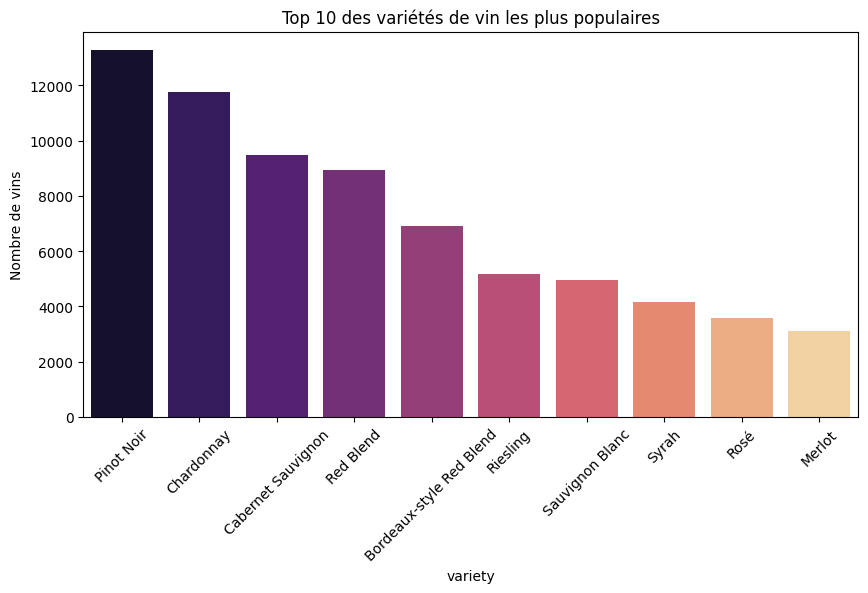

In [19]:
top_varieties = df["variety"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="magma", hue=top_varieties.index)
plt.title("Top 10 des vari√©t√©s de c√©pages les plus populaires")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

Ce diagramme met en √©vidence les 10 c√©pages les plus courants dans le dataset. Les vari√©t√©s en t√™te, comme le Cabernet Sauvignon, Chardonnay ou Pinot Noir, sont des c√©pages mondialement connus, largement cultiv√©s et appr√©ci√©s. Leur popularit√© peut √™tre due √† leur forte production, √† la demande du march√© ou √† leur pr√©sence dans les critiques de vin.

Si une ou plusieurs vari√©t√©s dominent nettement, cela peut indiquer un biais dans la collecte des donn√©es, favorisant certaines r√©gions viticoles ou styles de vin. De plus, la forte pr√©sence des c√©pages am√©ricains peut refl√©ter la surrepr√©sentation des vins des √âtats-Unis dans le dataset, cr√©ant un d√©s√©quilibre au d√©triment de certaines vari√©t√©s locales d‚Äôautres pays. Une analyse plus fine des notes moyennes par c√©page permettrait d‚Äô√©valuer si les vari√©t√©s les plus populaires sont aussi celles jug√©es de meilleure qualit√©. üç∑

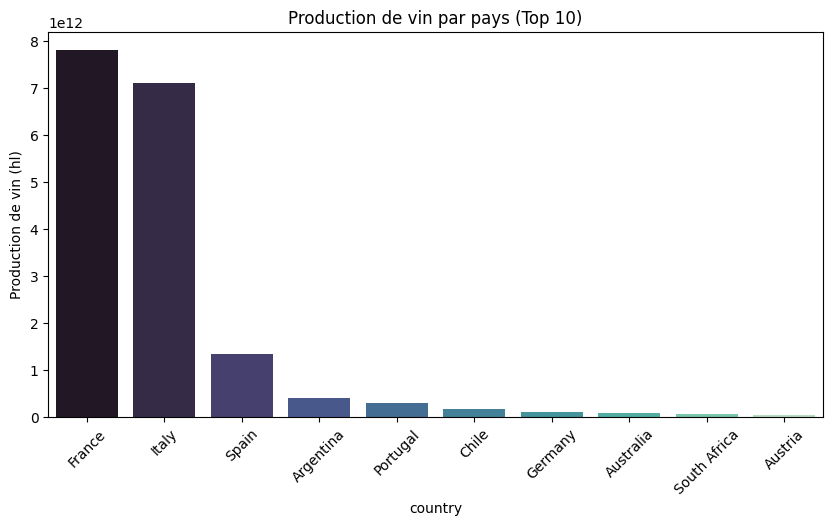

In [24]:
# csv :Entity,Code,Year,Wine
# fais une jointure entre les deux dataframes sur la colonne "Entity"
# fais un graph avec la production de vin en fonction du pays
df_merged = pd.merge(df, df_prod, left_on="country", right_on="Entity")
df_merged = df_merged.groupby("country")["Wine"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=df_merged.index, y=df_merged.values, palette="mako", hue=df_merged.index)
plt.title("Production de vin par pays (Top 10)")
plt.ylabel("Production de vin (hl)")
plt.xticks(rotation=45)
plt.show()



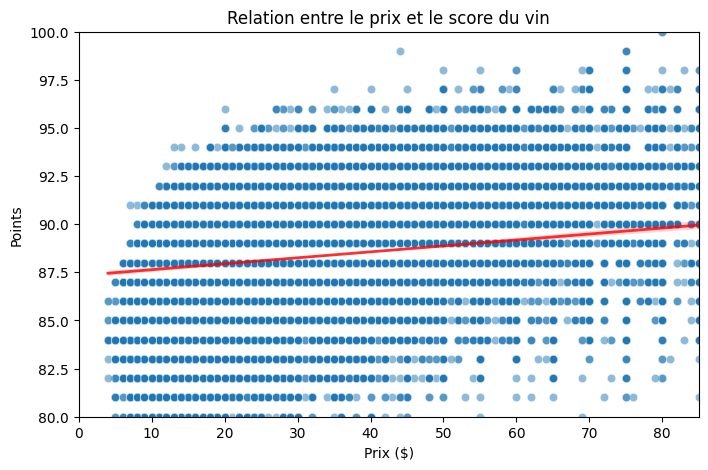

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["price"], y=df["points"], alpha=0.5)
sns.regplot(x=df["price"], y=df["points"], scatter=False, color="red", line_kws={"linewidth": 2, "alpha": 0.8})
plt.xlim(0, df["price"].quantile(0.95))  # Exclure les valeurs extr√™mes
plt.ylim(80, 100)
plt.title("Relation entre le prix et le score du vin")
plt.xlabel("Prix ($)")
plt.ylabel("Points")
plt.show()

Analyse de la relation entre les notes et les prix : 

Ce graphique met en √©vidence la relation entre les notes et les prix des vins. On observe une tendance positive : en g√©n√©ral, les vins les mieux not√©s ont tendance √† √™tre plus chers. Cependant, cette relation n'est pas lin√©aire, car il existe de nombreux vins bien not√©s √† des prix abordables, tandis que certains vins chers ont des notes moyennes.
Ainsi le prix n'est pas forc√©ment un indicateur absolu de qualit√©, et il est possible de trouver des vins de grande qualit√© √† des prix raisonnables.

In [ ]:
avg_price_country = df.groupby("country")["notation"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm", hue=avg_price_country.index)
plt.title("Notation moyenne des vins par pays (Top 10)")
plt.ylabel("Notation moyenne")
plt.xticks(rotation=45)
plt.show()